In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os. getcwd()

'C:\\Users\\Ramon\\Desktop\\SudokuSolvers\\src\\statistics_data'

In [2]:
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS']
sizes = ['4x4', '9x9']
for size in sizes:
    for heuristic in heuristics:
        filename = size+'/'+heuristic+'.csv'
        df = pd.read_csv(filename)
        #print(df)
        print(size + ' ',heuristic + ' mean time: ',df['Time'].mean(), ' branches: ',df['Branches'].mean())
    print('-------------------')
    
filename = '9x9'+'/'+'VSIDS'+'.csv'
df = pd.read_csv(filename)
df.sort_values(by=["Time"]) ## yikes.

4x4  None mean time:  0.0027707149982452  branches:  0.0
4x4  DLCS mean time:  0.002700836896896323  branches:  0.0
4x4  DLISN mean time:  0.0032182950973510312  branches:  0.0
4x4  DLISP mean time:  0.002826662778854349  branches:  0.0
4x4  MOMS mean time:  0.002760466098785382  branches:  0.0
4x4  VSIDS mean time:  0.00407886314392087  branches:  0.0
-------------------
9x9  None mean time:  0.6703439130783081  branches:  3.892
9x9  DLCS mean time:  1.1164331886768342  branches:  123.877
9x9  DLISN mean time:  0.9898407735824585  branches:  79.485
9x9  DLISP mean time:  0.6643650755882263  branches:  4.542
9x9  MOMS mean time:  0.6564850664138794  branches:  3.429
9x9  VSIDS mean time:  1.0937753694057464  branches:  8.71
-------------------


,Unnamed: 0,start Length,Time,Branches,Unit clauses removed,Pure clauses removed
30,30,23,0.951313,2,12003,0
186,186,24,0.952856,0,12012,0
0,0,21,0.952997,2,11998,0
31,31,23,0.962221,1,12006,0
461,461,25,0.965078,5,11962,0
...,...,...,...,...,...,...
550,550,25,2.327664,180,13554,0
660,660,25,2.685908,224,16475,0
558,558,25,3.018468,134,17311,0
679,679,23,4.051868,272,18533,0


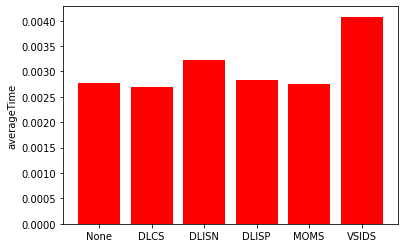

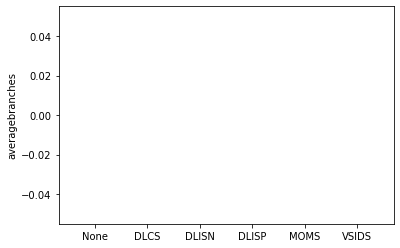

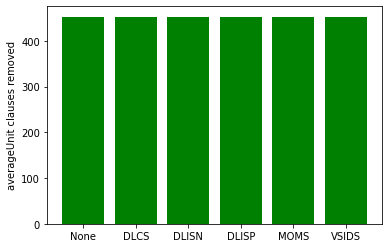

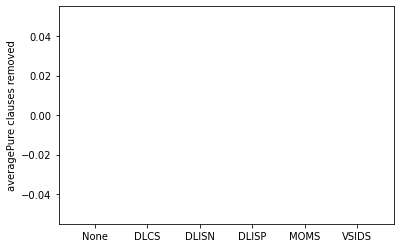

In [3]:
def makebarplots(sudokuSize=9, time=[], branches=[],unitCRemoved=[],pureCRemoved=[],
                   colors = ['red', 'cyan', 'green', 'purple'],
                   elementNames = ['Time', 'branches', 'Unit clauses removed', 'Pure clauses removed'],
                   heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS']
                   ):
    elements = [time, branches, unitCRemoved, pureCRemoved]
    for heuristic in heuristics:
        if(sudokuSize == 9):
            df = pd.read_csv('9x9/'+heuristic+'.csv')
        elif(sudokuSize == 4):
            df = pd.read_csv('4x4/'+heuristic+'.csv')
        time.append(df["Time"].mean())
        branches.append(df["Branches"].mean())
        unitCRemoved.append(df["Unit clauses removed"].mean())
        pureCRemoved.append(df["Pure clauses removed"].mean())
    for element, name, color in zip(elements, elementNames, colors):
        fig, ax = plt.subplots()
        ax.set_ylabel('average'+name)
        plt.bar(heuristics, element, color=color)
        plt.show()

makebarplots(sudokuSize=4) ## if you call this function from another cell it's broken
                           ## also calling it twice at once breaks it, idk man something with matplotlib

In [9]:
time9=[]
branches9 = []
unitCRemoved9= []
pureCRemoved9= []
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS']

for heuristic in heuristics:
    df = pd.read_csv('9x9/'+heuristic+'.csv')
    time9.append(df["Time"].mean())
    branches9.append(df["Branches"].mean())
    unitCRemoved9.append(df["Unit clauses removed"].mean())
    pureCRemoved9.append(df["Pure clauses removed"].mean())

In [10]:
time4=[]
branches4 = []
unitCRemoved4= []
pureCRemoved4= []
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS']

for heuristic in heuristics:
    df = pd.read_csv('4x4/'+heuristic+'.csv')
    time4.append(df["Time"].mean())
    branches4.append(df["Branches"].mean())
    unitCRemoved4.append(df["Unit clauses removed"].mean())
    pureCRemoved4.append(df["Pure clauses removed"].mean())

In [141]:
from scipy import stats
stats.ttest_ind(time4, time9, equal_var=False)

Ttest_indResult(statistic=-9.392521365785493, pvalue=0.00023068371489907698)

In [142]:
stats.ttest_ind(branches4, branches9)

Ttest_indResult(statistic=-1.764046924814822, pvalue=0.10819183770657687)

In [143]:
stats.ttest_ind(unitCRemoved4, unitCRemoved9)

Ttest_indResult(statistic=-230.8713579468384, pvalue=5.715136409353459e-20)

In [144]:
stats.ttest_ind(pureCRemoved4, pureCRemoved9)

Ttest_indResult(statistic=nan, pvalue=nan)

In [145]:
timeDLISN=[]
branchesDLISN = []
unitCRemovedDLISN= []
pureCRemovedDLISN= []
heuristics =[  'DLISN']

for heuristic in heuristics:
    df = pd.read_csv('9x9/'+heuristic+'.csv')
    timeDLISN.append(df["Time"][:500].mean())
    timeDLISN.append(df["Time"][500:].mean())
    branchesDLISN.append(df["Branches"][:500].mean())
    branchesDLISN.append(df["Branches"][500:].mean())
    unitCRemovedDLISN.append(df["Unit clauses removed"][:500].mean())
    unitCRemovedDLISN.append(df["Unit clauses removed"][500:].mean())
    pureCRemovedDLISN.append(df["Pure clauses removed"][:500].mean())
    pureCRemovedDLISN.append(df["Pure clauses removed"][500:].mean())

In [146]:
timeDLISP=[]
branchesDLISP = []
unitCRemovedDLISP= []
pureCRemovedDLISP= []
heuristics =[  'DLISP']

for heuristic in heuristics:
    df = pd.read_csv('9x9/'+heuristic+'.csv')
    timeDLISP.append(df["Time"][:500].mean())
    timeDLISP.append(df["Time"][500:].mean())
    branchesDLISP.append(df["Branches"][:500].mean())
    branchesDLISP.append(df["Branches"][500:].mean())
    unitCRemovedDLISP.append(df["Unit clauses removed"][:500].mean())
    unitCRemovedDLISP.append(df["Unit clauses removed"][500:].mean())
    pureCRemovedDLISP.append(df["Pure clauses removed"][:500].mean())
    pureCRemovedDLISP.append(df["Pure clauses removed"][500:].mean())

In [147]:
stats.ttest_ind(timeDLISP, timeDLISN)

Ttest_indResult(statistic=-13.530770928739901, pvalue=0.005417693207315647)

In [148]:
stats.ttest_ind(branchesDLISP, branchesDLISN)

Ttest_indResult(statistic=-26.722708126367262, pvalue=0.0013974233023386663)

In [149]:
stats.ttest_ind(unitCRemovedDLISP, unitCRemovedDLISN)

Ttest_indResult(statistic=-4.5128733572820625, pvalue=0.045757546299738557)

In [150]:
stats.ttest_ind(pureCRemovedDLISP, pureCRemovedDLISN)

Ttest_indResult(statistic=nan, pvalue=nan)

In [151]:
timeDLISP=[]
branchesDLISP = []
unitCRemovedDLISP= []
pureCRemovedDLISP= []
heuristics =[  'DLISP']

for heuristic in heuristics:
    df = pd.read_csv('9x9/'+heuristic+'.csv')
    timeDLISP.append(df["Time"][:500].mean())
    timeDLISP.append(df["Time"][500:].mean())
    branchesDLISP.append(df["Branches"][:500].mean())
    branchesDLISP.append(df["Branches"][500:].mean())
    unitCRemovedDLISP.append(df["Unit clauses removed"][:500].mean())
    unitCRemovedDLISP.append(df["Unit clauses removed"][500:].mean())
    pureCRemovedDLISP.append(df["Pure clauses removed"][:500].mean())
    pureCRemovedDLISP.append(df["Pure clauses removed"][500:].mean())

In [152]:
timeDLCS=[]
branchesDLCS = []
unitCRemovedDLCS= []
pureCRemovedDLCS= []
heuristics =[  'DLCS']

for heuristic in heuristics:
    df = pd.read_csv('9x9/'+heuristic+'.csv')
    timeDLCS.append(df["Time"][:500].mean())
    timeDLCS.append(df["Time"][500:].mean())
    branchesDLCS.append(df["Branches"][:500].mean())
    branchesDLCS.append(df["Branches"][500:].mean())
    unitCRemovedDLCS.append(df["Unit clauses removed"][:500].mean())
    unitCRemovedDLCS.append(df["Unit clauses removed"][500:].mean())
    pureCRemovedDLCS.append(df["Pure clauses removed"][:500].mean())
    pureCRemovedDLCS.append(df["Pure clauses removed"][500:].mean())

In [153]:
timeMOMS=[]
branchesMOMS = []
unitCRemovedMOMS= []
pureCRemovedMOMS= []
heuristics =[  'MOMS']

for heuristic in heuristics:
    df = pd.read_csv('9x9/'+heuristic+'.csv')
    timeMOMS.append(df["Time"][:500].mean())
    timeMOMS.append(df["Time"][500:].mean())
    branchesMOMS.append(df["Branches"][:500].mean())
    branchesMOMS.append(df["Branches"][500:].mean())
    unitCRemovedMOMS.append(df["Unit clauses removed"][:500].mean())
    unitCRemovedMOMS.append(df["Unit clauses removed"][500:].mean())
    pureCRemovedMOMS.append(df["Pure clauses removed"][:500].mean())
    pureCRemovedMOMS.append(df["Pure clauses removed"][500:].mean())

In [154]:
timeNone=[]
branchesNone = []
unitCRemovedNone= []
pureCRemovedNone= []
heuristics =[  'None']

for heuristic in heuristics:
    df = pd.read_csv('9x9/'+heuristic+'.csv')
    timeNone.append(df["Time"][:500].mean())
    timeNone.append(df["Time"][500:].mean())
    branchesNone.append(df["Branches"][:500].mean())
    branchesNone.append(df["Branches"][500:].mean())
    unitCRemovedNone.append(df["Unit clauses removed"][:500].mean())
    unitCRemovedNone.append(df["Unit clauses removed"][500:].mean())
    pureCRemovedNone.append(df["Pure clauses removed"][:500].mean())
    pureCRemovedNone.append(df["Pure clauses removed"][500:].mean())

In [155]:
stats.ttest_ind(timeNone, timeDLCS)

Ttest_indResult(statistic=-64.91577531796982, pvalue=0.0002372165301290855)

In [156]:
stats.ttest_ind(timeNone, timeDLISN)

Ttest_indResult(statistic=-15.441606360901632, pvalue=0.004167671024823506)

In [157]:
stats.ttest_ind(timeNone, timeDLISP)

Ttest_indResult(statistic=0.4162194468368967, pvalue=0.7176624382648094)

In [158]:
stats.ttest_ind(timeNone, timeMOMS)

Ttest_indResult(statistic=2.335484695577171, pvalue=0.14460226987002114)

In [159]:
stats.ttest_ind(branchesNone, branchesDLCS)

Ttest_indResult(statistic=-34.99102492419441, pvalue=0.0008157461048001211)

In [160]:
stats.ttest_ind(branchesNone, branchesDLISN)

Ttest_indResult(statistic=-27.602541248905773, pvalue=0.0013099293398337833)

In [161]:
stats.ttest_ind(branchesNone, branchesDLISP)

Ttest_indResult(statistic=-0.7964418491125871, pvalue=0.5092957280480146)

In [162]:
stats.ttest_ind(branchesNone, branchesMOMS)

Ttest_indResult(statistic=0.919431144219459, pvalue=0.4549314981820918)

In [163]:
stats.ttest_ind(unitCRemovedNone, unitCRemovedDLCS)

Ttest_indResult(statistic=-8.809961268190733, pvalue=0.012640269484346668)

In [164]:
stats.ttest_ind(unitCRemovedNone, unitCRemovedDLISN)

Ttest_indResult(statistic=-11.668051145600481, pvalue=0.0072652456758077275)

In [165]:
stats.ttest_ind(unitCRemovedNone, unitCRemovedDLISP)

Ttest_indResult(statistic=-0.4249909068160678, pvalue=0.7122005801277356)

In [166]:
stats.ttest_ind(unitCRemovedNone, unitCRemovedMOMS)

Ttest_indResult(statistic=-1.7785096453224396, pvalue=0.2172896056869491)

In [167]:
stats.ttest_ind(pureCRemovedNone, pureCRemovedDLCS)

Ttest_indResult(statistic=nan, pvalue=nan)

In [168]:
stats.ttest_ind(pureCRemovedNone, pureCRemovedDLISN)

Ttest_indResult(statistic=nan, pvalue=nan)

In [169]:
stats.ttest_ind(pureCRemovedNone, pureCRemovedDLISP)

Ttest_indResult(statistic=nan, pvalue=nan)

In [170]:
stats.ttest_ind(pureCRemovedNone, pureCRemovedMOMS)

Ttest_indResult(statistic=nan, pvalue=nan)

['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.6703439130783081, 1.1164331886768342, 0.9898407735824585, 0.6643650755882263, 0.6564850664138794, 1.0937753694057464]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [3.892, 123.877, 79.485, 4.542, 3.429, 8.71]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [12166.522, 12426.335, 12431.753, 12190.224, 12202.332, 12190.384]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


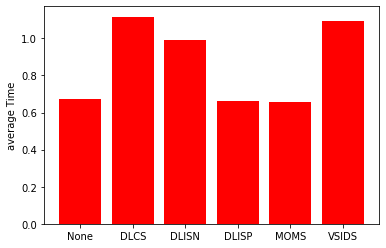

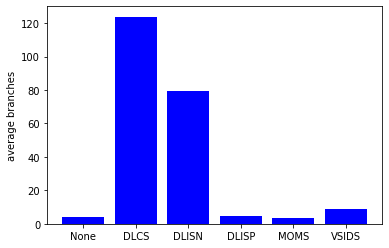

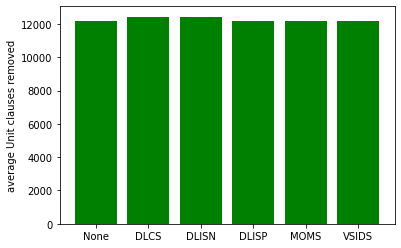

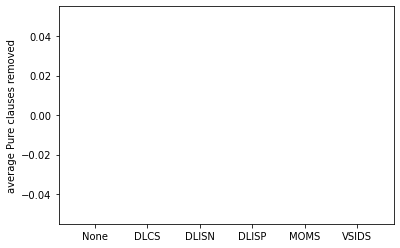

['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0027707149982452, 0.002700836896896323, 0.0032182950973510312, 0.002826662778854349, 0.002760466098785382, 0.00407886314392087]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [452.934, 452.934, 452.934, 452.934, 452.934, 452.934]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


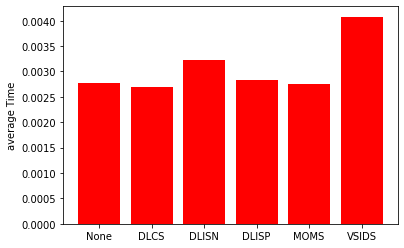

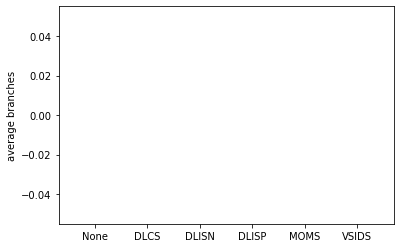

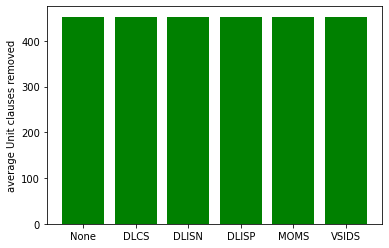

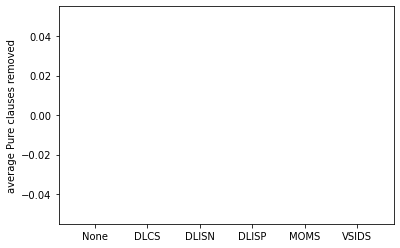

In [85]:
colors = ['red', 'blue', 'green', 'purple']
elementNames = ['Time', 'branches', 'Unit clauses removed', 'Pure clauses removed']
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS']


sizes = ['9x9','4x4']
for size in sizes:
    time=[]
    branches=[]
    unitCRemoved=[]
    pureCRemoved=[]
    meme = []
    elements = [time, branches, unitCRemoved, pureCRemoved]
    for heuristic in heuristics:
        filename = size+'/'+heuristic+'.csv'
        df = pd.read_csv(filename)
        time.append(df["Time"].mean())
        branches.append(df["Branches"].mean())
        unitCRemoved.append(df["Unit clauses removed"].mean())
        pureCRemoved.append(df["Pure clauses removed"].mean())

    for element, name, color in zip(elements, elementNames, colors):
        fig, ax = plt.subplots()
        ax.set_ylabel('average '+name)
        print(heuristics, element)
        plt.bar(heuristics, element, color=color)
    plt.show()

[0.0027707149982452, 0.002700836896896323, 0.0032182950973510312, 0.002826662778854349, 0.002760466098785382]
[0.6703439130783081, 1.1164331886768342, 0.9898407735824585, 0.6643650755882263, 0.6564850664138794]


c:\users\ramon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


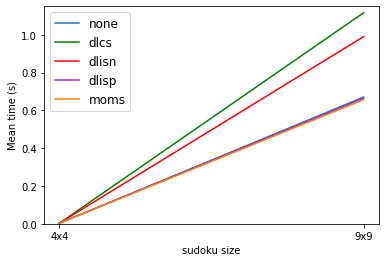

In [84]:
print(time4)
print(time9)
lists = ['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS']

none = [time4[0],time9[0]]
dlcs = [time4[1],time9[1]]
dlisn = [time4[2],time9[2]]
dlisp = [time4[3],time9[3]]
moms = [time4[4],time9[4]]

fig, ax = plt.subplots()
plt.plot(none, label='none')
plt.plot(dlcs, label='dlcs', color= 'green')
plt.plot(dlisn, label='dlisn', color='red')
plt.plot(dlisp, label='dlisp', color='darkorchid')
plt.plot(moms, label='moms')
plt.legend(prop={'size': 12})
plt.locator_params(axis='x',nbins=2)
plt.ylabel("Mean time (s)")
plt.xlabel("sudoku size")
ax.set_ylim([0, 1.15])
ax.set_xticklabels([3, '4x4', '9x9'])
#plt.savefig('time comparisons.png')
plt.show()


